In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
import datetime

In [2]:
days=30

In [3]:
dataset=pd.read_csv('LAC.csv')
dataset['Date']  = pd.to_datetime(dataset['Date'])
dataset = dataset.set_index('Date')


dataset_train = dataset.iloc[:1000,1:2]
dataset_test = dataset.iloc[1000:, 1:2]

In [4]:
training_set  = dataset_train.replace(',','', regex=True).astype(float).values
test_set  = dataset_test.replace(',','', regex=True).astype(float).values

sc=MinMaxScaler(feature_range=(0,1))
training_set_scaled=sc.fit_transform(training_set)


X_train=[]
y_train=[]

for i in range (days,len(dataset_train)):
    X_train.append(training_set_scaled[i-days:i,0])
    y_train.append(training_set_scaled[i,0])
    
    
X_train=np.array(X_train)
y_train=np.array(y_train)

X_train=np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))

In [5]:
model = Sequential()
model.add(LSTM(days-10, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.1))

model.add(LSTM(days-10, return_sequences=True))
model.add(Dropout(0.1))

model.add(Dense(1))


model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train,y_train, epochs=50, batch_size=10)

Epoch 1/50
97/97 [==============================] - 3s 10ms/step - loss: 0.0406
Epoch 2/50
97/97 [==============================] - 1s 9ms/step - loss: 0.0141
Epoch 3/50
97/97 [==============================] - 1s 9ms/step - loss: 0.0118
Epoch 4/50
97/97 [==============================] - 1s 10ms/step - loss: 0.0105
Epoch 5/50
97/97 [==============================] - 1s 9ms/step - loss: 0.0097
Epoch 6/50
97/97 [==============================] - 1s 10ms/step - loss: 0.0090
Epoch 7/50
97/97 [==============================] - 1s 9ms/step - loss: 0.0084
Epoch 8/50
97/97 [==============================] - 1s 10ms/step - loss: 0.0082
Epoch 9/50
97/97 [==============================] - 1s 9ms/step - loss: 0.0078
Epoch 10/50
97/97 [==============================] - 1s 10ms/step - loss: 0.0075
Epoch 11/50
97/97 [==============================] - 1s 9ms/step - loss: 0.0072
Epoch 12/50
97/97 [==============================] - 1s 10ms/step - loss: 0.0070
Epoch 13/50
97/97 [========================

In [6]:
# Test Set Index
index=[]
for date in dataset_test.reset_index()['Date']:
    index.append(date.date())

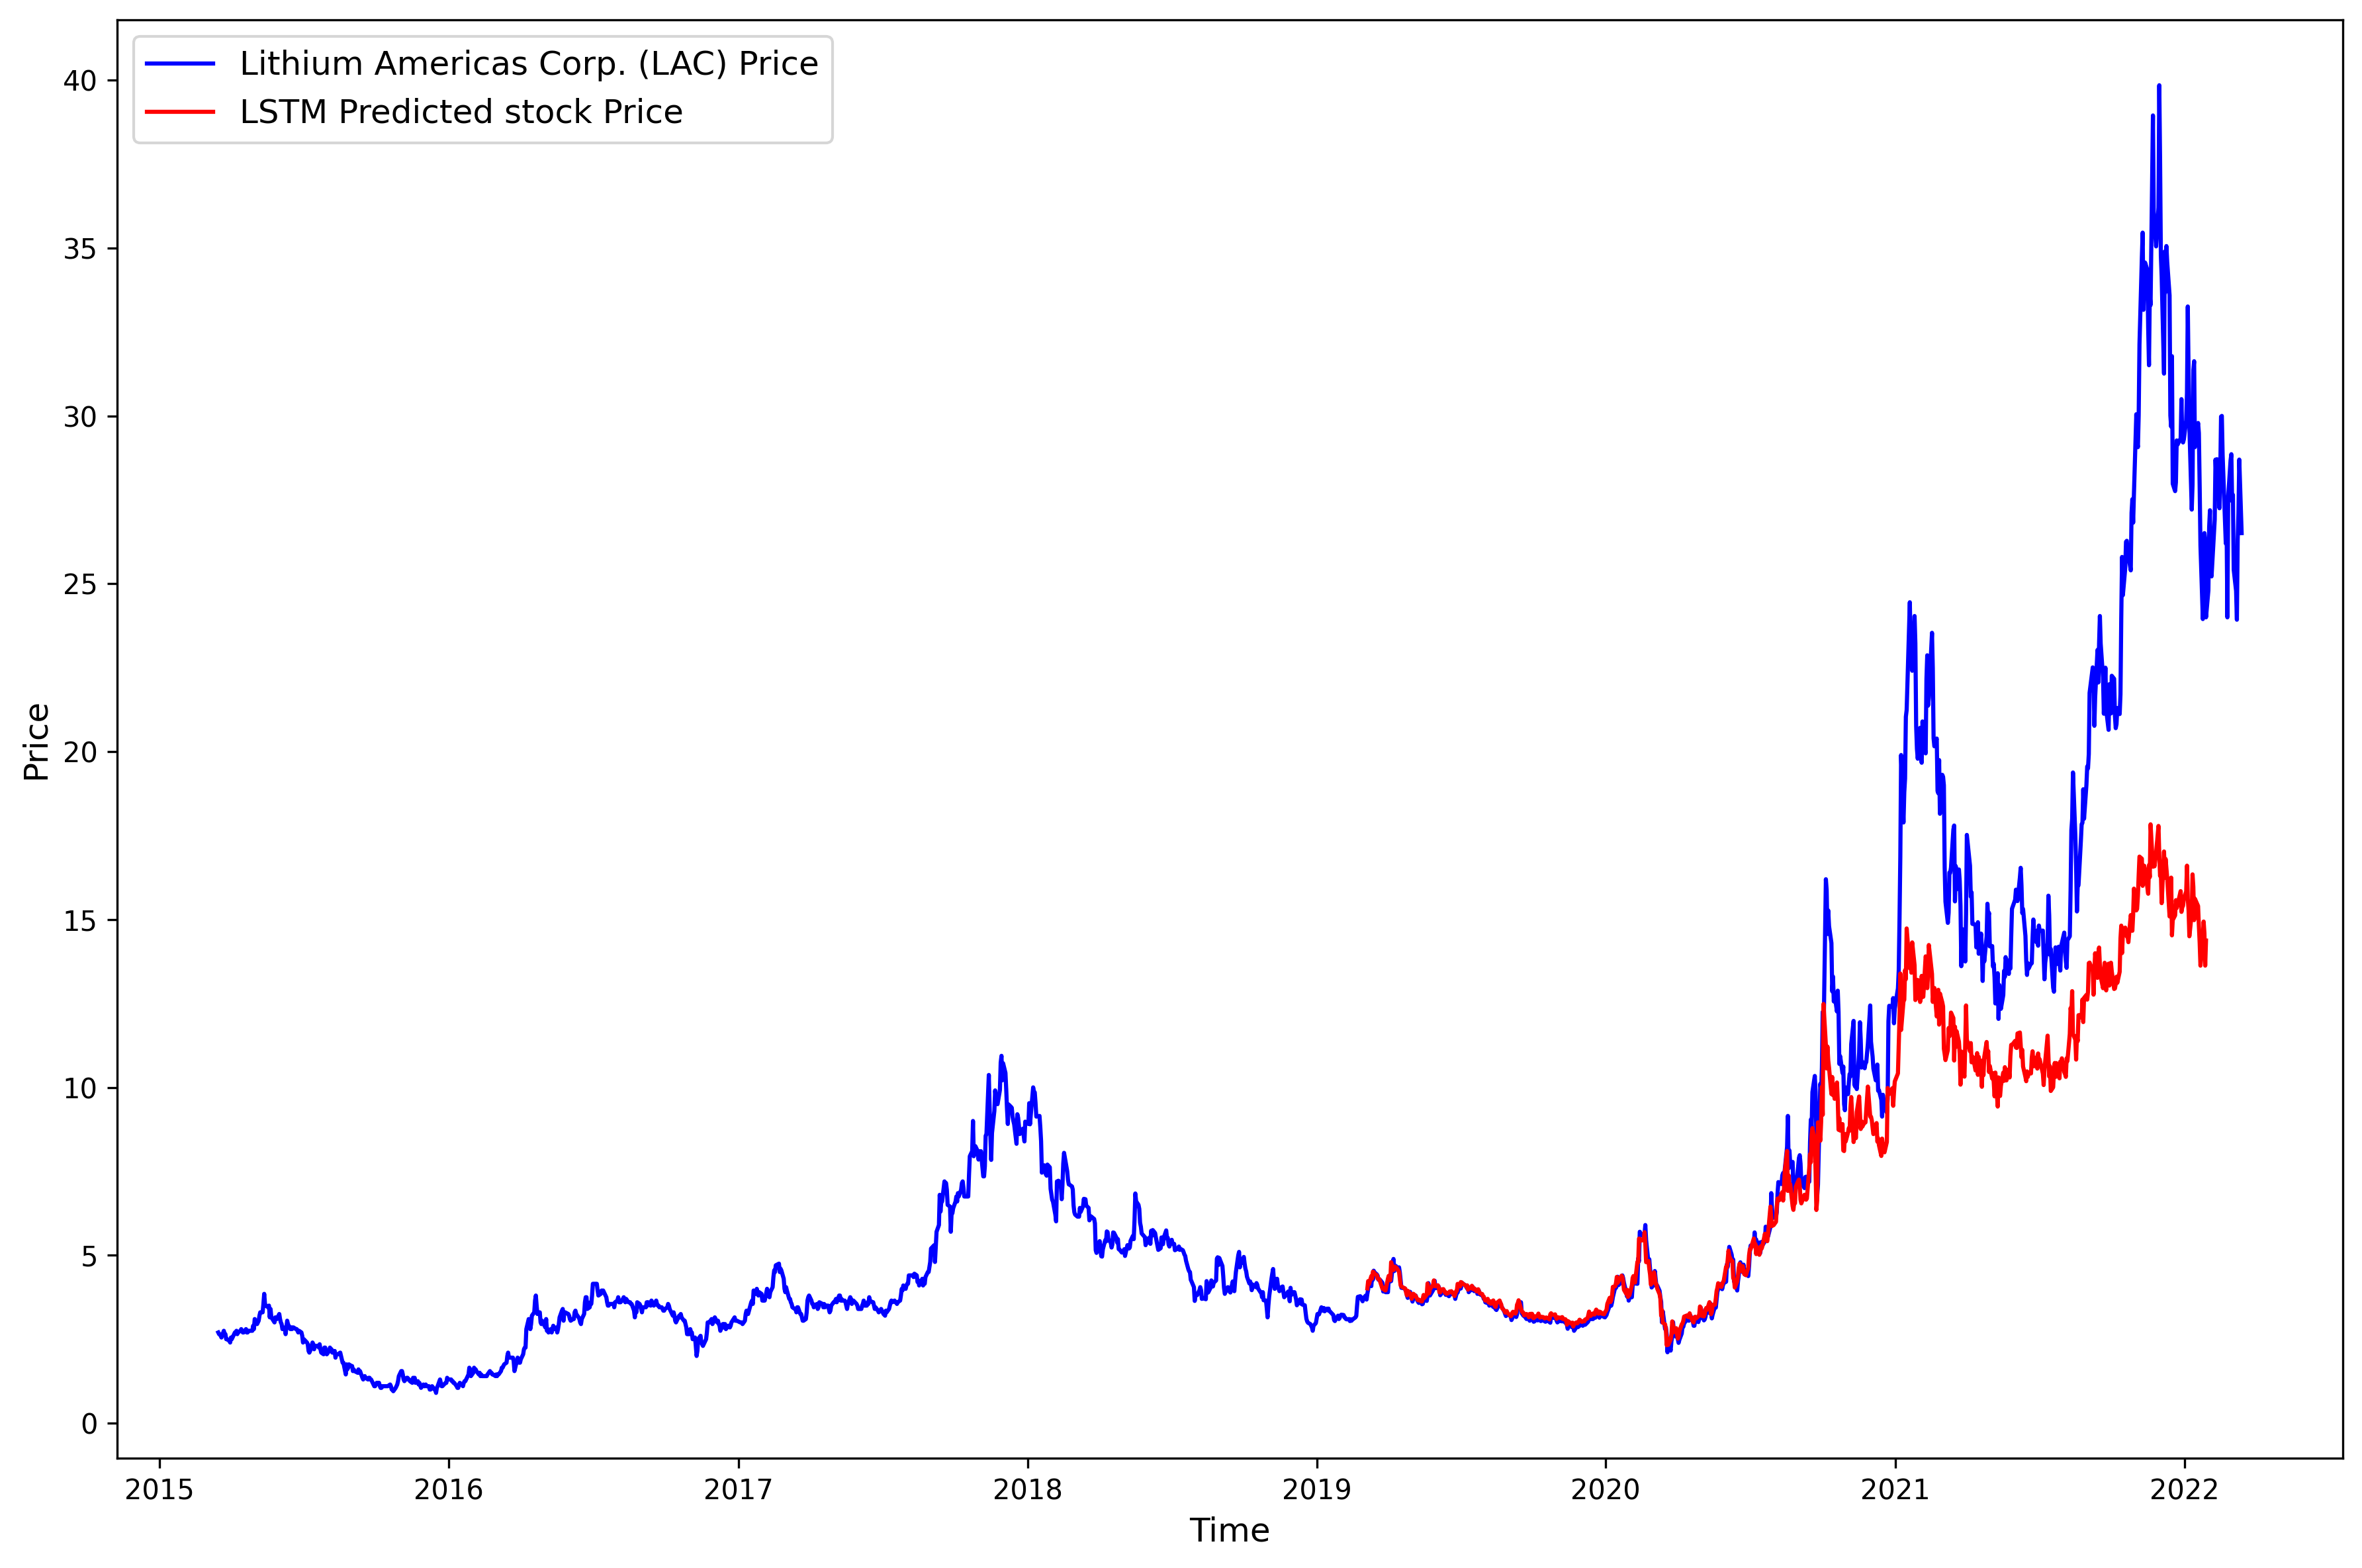

In [7]:


inputs=dataset[len(dataset_train)-days:]['Open'].replace(',','', regex=True).astype(float)
inputs=np.array(inputs).reshape(-1,1)
inputs = sc.transform(inputs)

X_test=[]

for i in range (days,len(dataset_test)+days):
    X_test.append(inputs[i-days:i,0])

X_test=np.array(X_test)
X_test=np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))

y_hat=model.predict(X_test)
Y_hat=sc.inverse_transform(y_hat[:,1])


Predictions = pd.DataFrame(Y_hat[0:,0], columns = ['y_hat'], index = index)
Predictions = Predictions.shift(-days).dropna()



plt.figure(figsize=(12,8), dpi=300)
plt.plot(dataset['Open'].replace(',','', regex=True).astype(float), color='b', label= 'Lithium Americas Corp. (LAC) Price')
plt.plot(Predictions['y_hat'], color='r', label= 'LSTM Predicted stock Price')
plt.legend(fontsize=12)
plt.xlabel('Time', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.tight_layout()
plt.savefig('LAC Predicted Price', dpi=200);